In [1]:
!pip install pandas scikit-learn

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# 21대 의석 예측
라벨에서 1개씩 빼고 진행

In [81]:
data = {
    '대수': [17, 18, 19, 20],
    'a': [100, 131, 127, 105],
    'b': [129, 66, 106, 110],
    'c': [14, 47, 13, 38],
    '총석수': [243, 244, 253, 253]
}

df = pd.DataFrame(data)
# 17대 18대 데이터를 253석 비율에 맞게 수정하기
df['a'] = df['a'] / df['총석수'] * 253
df['b'] = df['b'] / df['총석수'] * 253
df['c'] = df['c'] / df['총석수'] * 253

# 훈련 데이터 및 레이블 생성
X = df[['대수']]
y_a = df['a']
y_b = df['b']
y_c = df['c']

# 머신러닝 모델 훈련
model_a = RandomForestRegressor(n_estimators=100, random_state=42)
model_a.fit(X, y_a)

model_b = RandomForestRegressor(n_estimators=100, random_state=42)
model_b.fit(X, y_b)

model_c = RandomForestRegressor(n_estimators=100, random_state=42)
model_c.fit(X, y_c)

RandomForestRegressor(random_state=42)

In [75]:
# 21대 의석 예측
future_data = {'대수': [21]}
future_df = pd.DataFrame(future_data)

predicted_a = model_a.predict(future_df)[0]
predicted_b = model_b.predict(future_df)[0]
predicted_c = model_c.predict(future_df)[0]

# 예측값을 반올림하고, 합이 253이 되도록 조정
total_predicted_seats = round(predicted_a) + round(predicted_b) + round(predicted_c)

# 각 정당 예측 의석수를 조정
predicted_a = round(predicted_a + (253 - total_predicted_seats) * (predicted_a / total_predicted_seats))
predicted_b = round(predicted_b + (253 - total_predicted_seats) * (predicted_b / total_predicted_seats))
predicted_c = round(predicted_c + (253 - total_predicted_seats) * (predicted_c / total_predicted_seats))

print(f"21대 지역구 예상 의석 - A: {int(predicted_a)}, B: {int(predicted_b)}, C: {int(predicted_c)}")

21대 지역구 예상 의석 - A: 113, B: 107, C: 34


KeyError: 4

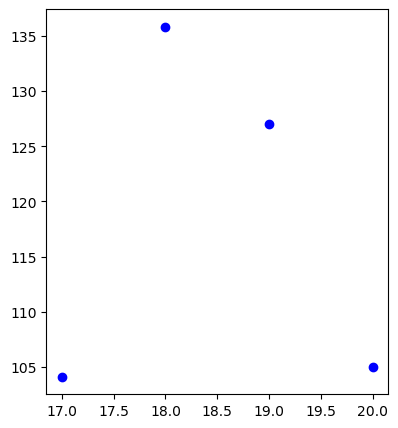

In [77]:
import matplotlib.pyplot as plt

# Replace these with your actual values for '대수' 21
actual_a_21 = 84
actual_b_21 = 163
actual_c_21 = 6
x_ticks = [17, 18, 19, 20, 21]

# Add the actual values for '대수' 21 to the DataFrame
df.loc[5] = [21, actual_a_21, actual_b_21, actual_c_21, 253]

# Plotting
plt.figure(figsize=(15, 5))

# Plot for 'a'
plt.subplot(1, 3, 1)
plt.scatter(df['대수'][:4], df['a'][:4], color='blue', label='Actual (17-20)')
plt.scatter(df['대수'][4], df['a'][4], color='green', label='Predicted (21)')
plt.scatter(df['대수'][5], df['a'][5], color='red', label='Actual (21)')
plt.title('Actual vs Predicted for a')
plt.xlabel('대수')
plt.ylabel('a')
plt.xticks(x_ticks)  
plt.legend()

# Plot for 'b'
plt.subplot(1, 3, 2)
plt.scatter(df['대수'][:4], df['b'][:4], color='blue', label='Actual (17-20)')
plt.scatter(df['대수'][4], df['b'][4], color='green', label='Predicted (21)')
plt.scatter(df['대수'][5], df['b'][5], color='red', label='Actual (21)')
plt.title('Actual vs Predicted for b')
plt.xlabel('대수')
plt.ylabel('b')
plt.xticks(x_ticks) 
plt.legend()

# Plot for 'c'
plt.subplot(1, 3, 3)
plt.scatter(df['대수'][:4], df['c'][:4], color='blue', label='Actual (17-20)')
plt.scatter(df['대수'][4], df['c'][4], color='green', label='Predicted (21)')
plt.scatter(df['대수'][5], df['c'][5], color='red', label='Actual (21)')
plt.title('Actual vs Predicted for c')
plt.xlabel('대수')
plt.ylabel('c')
plt.xticks(x_ticks)  
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
# 데이터 리스트 만들기
data_new = {
    '대수': [17, 18, 19, 20],
    'c': [12, 17, 8, 17],
    '총석수': [56, 54, 54, 47]
}

df_new = pd.DataFrame(data_new)

# 17대 18대 19대 데이터를 47석 비율에 맞게 수정하기
df_new['c'] = df_new['c'] / df_new['총석수'] * 47

# 훈련 데이터 및 레이블 생성
X_new = df_new[['대수']]
y_c_new = df_new['c']

# 머신러닝(회귀분석) 모델 훈련
model_c_new = RandomForestRegressor(n_estimators=100, random_state=42)
model_c_new.fit(X_new, y_c_new)

RandomForestRegressor(random_state=42)

In [52]:
# 21대 의석 예측
future_data_new = {'대수': [21]}
future_df_new = pd.DataFrame(future_data_new)

predicted_c_new = model_c_new.predict(future_df_new)[0]

# 예측값을 반올림하고, 총 의석수가 47이 되도록 조정
predicted_c_new = int(round(predicted_c_new))

# 예상 의석 수에 비례하는 c당의 정당 득표율 계산
predicted_c_new = predicted_c_new / 47

print(f"21대 정당득표율 - C: {predicted_c_new:.2f}")

21대 정당득표율 - C: 0.32


In [78]:
#득표율의 총합이 1이 되도록 수정
ratios = [0.17, 0.70, 0.32]
ratios_df = pd.DataFrame(ratios, columns=['ratio'])
original_sum = ratios_df['ratio'].sum()

target_sum = 1

# 가중치 계산
scaling_factor = target_sum / original_sum

# 가중치 적용된 새로운 득표율
scaled_ratios = ratios_df['ratio'] * scaling_factor

scaled_ratios_sum = scaled_ratios.sum()
scaled_ratios

0    0.142857
1    0.588235
2    0.268908
Name: ratio, dtype: float64

In [79]:
# 병립형 비례 의석 구하기
byeong_a = (scaled_ratios[0] * 17).round()
byeong_b = (scaled_ratios[1] * 17).round()
byeong_c = (scaled_ratios[2] * 17).round()

print(f"병립형 비례의석 수 - A: {byeong_a}, B: {byeong_b}, C: {byeong_c}")

병립형 비례의석 수 - A: 2.0, B: 10.0, C: 5.0


In [55]:
#준연동형 비례의석 수

A = (300*((scaled_ratios[0]).round(2))-int(predicted_a))/2
B = (300*((scaled_ratios[1]).round(2))-int(predicted_b))/2
C = (300*((scaled_ratios[2]).round(2))-int(predicted_c))/2
print(A, B, C)

-35.5 35.0 23.5


In [56]:
#준연동형 비례의석 30석에 맞도록 재분배
ratios = [B, C]
ratios_df = pd.DataFrame(ratios, columns=['ratio'])
original_sum = ratios_df['ratio'].sum()

target_sum = 30

# 가중치 계산
scaling_factor = target_sum / original_sum

# 가중치 적용된 새로운 득표율
scaled_ratios = ratios_df['ratio'] * scaling_factor

scaled_ratios_sum = scaled_ratios.sum()
scaled_ratios

0    17.948718
1    12.051282
Name: ratio, dtype: float64

# 22대 의석 예측

In [57]:
# 데이터 리스트 만들기
data = {
    '대수': [17, 18, 19, 20, 21],
    'a': [100, 131, 127, 105, 84],
    'b': [129, 66, 106, 110, 163],
    'c': [14, 47, 13, 38, 6],
    '총석수': [243, 244, 253, 253, 253]
}


In [58]:
df = pd.DataFrame(data)

In [59]:
# 17대 18대 데이터를 253석 비율에 맞게 수정하기
df['a'] = df['a'] / df['총석수'] * 253
df['b'] = df['b'] / df['총석수'] * 253
df['c'] = df['c'] / df['총석수'] * 253


In [60]:
# 훈련 데이터 및 레이블 생성
X = df[['대수']]
y_a = df['a']
y_b = df['b']
y_c = df['c']

In [61]:
# 머신러닝 모델 훈련
model_a = RandomForestRegressor(n_estimators=100, random_state=42)
model_a.fit(X, y_a)

model_b = RandomForestRegressor(n_estimators=100, random_state=42)
model_b.fit(X, y_b)

model_c = RandomForestRegressor(n_estimators=100, random_state=42)
model_c.fit(X, y_c)

RandomForestRegressor(random_state=42)

In [62]:
# 22대 의석 예측
future_data = {'대수': [22]}
future_df = pd.DataFrame(future_data)

predicted_a = model_a.predict(future_df)[0]
predicted_b = model_b.predict(future_df)[0]
predicted_c = model_c.predict(future_df)[0]

# 예측값을 반올림하고, 합이 253이 되도록 조정
total_predicted_seats = round(predicted_a) + round(predicted_b) + round(predicted_c)

# 각 정당 예측 의석수를 조정
predicted_a = round(predicted_a + (253 - total_predicted_seats) * (predicted_a / total_predicted_seats))
predicted_b = round(predicted_b + (253 - total_predicted_seats) * (predicted_b / total_predicted_seats))
predicted_c = round(predicted_c + (253 - total_predicted_seats) * (predicted_c / total_predicted_seats))

print(f"22대 지역구 예상 의석 - A: {int(predicted_a)}, B: {int(predicted_b)}, C: {int(predicted_c)}")

22대 지역구 예상 의석 - A: 94, B: 144, C: 15


22대 지역구 예상의석은 A(국민의 힘): 94석 B(더불어 민주당): 144석 C(그 외): 15석

비례대표 예상의석의 경우 A와 B 양당은 댓글 분석을 통한 비율로 예측하고 C는 17대 ~ 21대에 해당하는 비율을 회귀분석으로 예측한다.

In [63]:
# 데이터 리스트 만들기
data_new = {
    '대수': [17, 18, 19, 20, 21],
    'c': [12, 17, 8, 17, 11],
    '총석수': [56, 54, 54, 47, 47]
}

df_new = pd.DataFrame(data_new)

# 17대 18대 19대 데이터를 47석 비율에 맞게 수정하기
df_new['c'] = df_new['c'] / df_new['총석수'] * 47

# 훈련 데이터 및 레이블 생성
X_new = df_new[['대수']]
y_c_new = df_new['c']

# 머신러닝(회귀분석) 모델 훈련
model_c_new = RandomForestRegressor(n_estimators=100, random_state=42)
model_c_new.fit(X_new, y_c_new)

RandomForestRegressor(random_state=42)

In [64]:
# 22대 의석 예측
future_data_new = {'대수': [22]}
future_df_new = pd.DataFrame(future_data_new)

predicted_c_new = model_c_new.predict(future_df_new)[0]

# 예측값을 반올림하고, 총 의석수가 47이 되도록 조정
predicted_c_new = int(round(predicted_c_new))

# 예상 의석 수에 비례하는 c당의 정당 득표율 계산
predicted_c_new = predicted_c_new / 47

print(f"22대 정당득표율 - C: {predicted_c_new:.2f}")

22대 정당득표율 - C: 0.26


In [69]:
#득표율의 총합이 1이 되도록 수정
ratios = [0.61, 0.66, 0.26]
ratios_df = pd.DataFrame(ratios, columns=['ratio'])
original_sum = ratios_df['ratio'].sum()

target_sum = 1

# 가중치 계산
scaling_factor = target_sum / original_sum

# 가중치 적용된 새로운 득표율
scaled_ratios = ratios_df['ratio'] * scaling_factor

scaled_ratios_sum = scaled_ratios.sum()
scaled_ratios

0    0.398693
1    0.431373
2    0.169935
Name: ratio, dtype: float64

22대 정당득표율을 바탕으로 비례대표 의석수 계산한다.

---

준연동형 비례 : 연동형 30석에 정당득표율 50%를 반영한 값

병립형 비례 : 17석에 한해 정당득표율을 계산한 값





In [70]:
# 병립형 비례 의석 구하기
byeong_a = (scaled_ratios[0] * 17).round()
byeong_b = (scaled_ratios[1] * 17).round()
byeong_c = (scaled_ratios[2] * 17).round()

print(f"병립형 비례의석 수 - A: {byeong_a}, B: {byeong_b}, C: {byeong_c}")

병립형 비례의석 수 - A: 7.0, B: 7.0, C: 3.0


In [71]:
#준연동형 비례의석 수

A = (300*((scaled_ratios[0]).round(2))-int(predicted_a))/2
B = (300*((scaled_ratios[1]).round(2))-int(predicted_b))/2
C = (300*((scaled_ratios[2]).round(2))-int(predicted_c))/2
print(A, B, C)

13.0 -7.5 18.000000000000004


In [72]:
#준연동형 비례의석 30석에 맞도록 재분배
ratios = [A, C]
ratios_df = pd.DataFrame(ratios, columns=['ratio'])
original_sum = ratios_df['ratio'].sum()

target_sum = 30

# 가중치 계산
scaling_factor = target_sum / original_sum

# 가중치 적용된 새로운 득표율
scaled_ratios = ratios_df['ratio'] * scaling_factor

scaled_ratios_sum = scaled_ratios.sum()
scaled_ratios

0    12.580645
1    17.419355
Name: ratio, dtype: float64